# Text and code

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [1]:
print('hello world')

hello world


In [7]:
# Hidden Code - Backend Processing Logic

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.ndimage import convolve
from skimage import data
from IPython.display import display

# Load a built-in grayscale image from skimage
original_image = data.camera()
image = np.array(original_image)

# Define filter functions
def apply_original(img):
    return img

# UI Widgets
filter_dropdown = widgets.Dropdown(
    options=["Original", "Inverted", "Threshold", "Blur", "Edge Detection"],
    value="Blur",
    description="Filter:"
)

blur_slider = widgets.IntSlider(
    min=1, max=15, step=2, value=3
)

blur_label = widgets.Label(value=r"Blur Strength (Sigma):")
blur_box = widgets.VBox([blur_label, blur_slider])
blur_box.layout.display = 'none'

def update_visibility(change):
    blur_box.layout.display = 'block' if change['new'] == "Blur" else 'none'

filter_dropdown.observe(update_visibility, names='value')

ui = widgets.VBox([filter_dropdown, blur_box])

# User-Accessible Code - Functions for Applying Filters and Running UI

def process_image(filter_type, blur_strength=3):
    """Processes the image based on selected filter type."""
    if filter_type == "Original":
        processed_img = apply_original(image)
    elif filter_type == "Inverted":
        processed_img = apply_inverted(image)
    elif filter_type == "Threshold":
        processed_img = apply_threshold(image)
    elif filter_type == "Blur":
        processed_img = apply_blur(image, blur_strength)
    elif filter_type == "Edge Detection":
        processed_img = apply_edge_detection(image)

    # Display original and processed images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title("Original Image")
    
    axes[1].imshow(processed_img, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title(filter_type)
    
    plt.show()

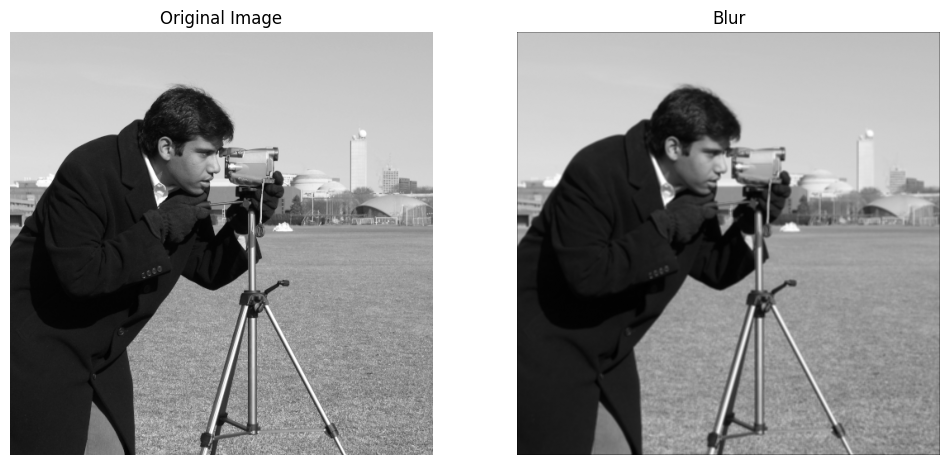

Output()

In [8]:
def apply_inverted(img):
    return 255 - img

def apply_threshold(img):
    return (img > 127) * 255  # Binary thresholding

def apply_blur(img, kernel_size=3):
    if kernel_size < 1:
        return img
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    return convolve(img, kernel, mode='constant', cval=0)

def apply_edge_detection(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    edge_x = convolve(img.astype(float), sobel_x, mode='constant', cval=0)
    edge_y = convolve(img.astype(float), sobel_y, mode='constant', cval=0)
    processed_img = np.sqrt(edge_x**2 + edge_y**2)
    return (processed_img / processed_img.max()) * 255  # Normalize
    
# Ignore part below this code
output = widgets.interactive_output(process_image, {
    'filter_type': filter_dropdown,
    'blur_strength': blur_slider
})

display(ui, output)